In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ice_cream selling data.csv')

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.shape

(49, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [6]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [7]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [8]:
# no null values

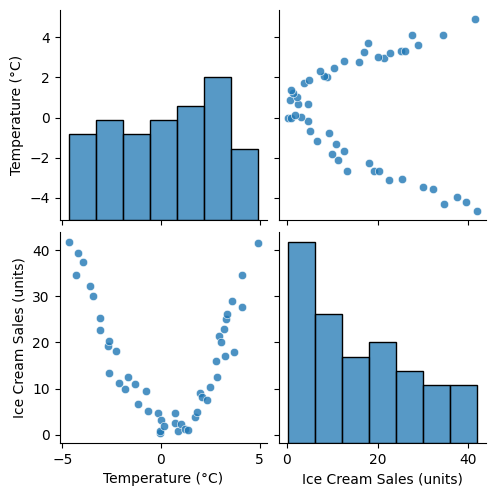

In [9]:
sns.pairplot(df,kind='scatter', plot_kws = {"alpha":0.8})
plt.show()

In [10]:
# There is a pretty clear parabolic co-relation here between the temperature and Ice cream sales

In [11]:
from sklearn.model_selection import train_test_split as tts

In [12]:
features = df[['Temperature (°C)']]
label = df[['Ice Cream Sales (units)']]

In [13]:
X_train, X_test, y_train, y_test = tts(features, label, test_size = 0.1, random_state = 30)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 1), (5, 1), (44, 1), (5, 1))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [19]:
degree = 2
# because it's a  parabola (x^2)

In [20]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error as mse
from math import sqrt

In [24]:
print("Mean Squared Error: ", mse(y_test, predictions))
print("Root Mean Squared Error: ", sqrt(mse(y_test, predictions)))
print("r2 Score: ", r2_score(y_test, predictions))

Mean Squared Error:  10.56202205921511
Root Mean Squared Error:  3.2499264698166805
r2 Score:  0.8888768319172998


In [25]:
#
# Good R Score (0.8889) → Model explains most variance.
# Low RMSE (3.25) compared to target range (15 – 41.84) → Predictions are relatively close.
#